Weight: 0 F1 Score Random Forest (k-fold): 0.0
Weight: 1 F1 Score Random Forest (k-fold): 0.0997272888892842
Weight: 2 F1 Score Random Forest (k-fold): 0.09532130476529442
Weight: 3 F1 Score Random Forest (k-fold): 0.09163791507444627
Weight: 4 F1 Score Random Forest (k-fold): 0.09087922084190045
Weight: 5 F1 Score Random Forest (k-fold): 0.0885590120908427
Weight: 6 F1 Score Random Forest (k-fold): 0.09042462598094633
Weight: 7 F1 Score Random Forest (k-fold): 0.0872644787191661
Weight: 8 F1 Score Random Forest (k-fold): 0.08894187487888043
Weight: 9 F1 Score Random Forest (k-fold): 0.08796699764330045
Weight: 10 F1 Score Random Forest (k-fold): 0.08671112359548275
Weight: 11 F1 Score Random Forest (k-fold): 0.08599375429987191
Weight: 12 F1 Score Random Forest (k-fold): 0.08224330131952239
Weight: 13 F1 Score Random Forest (k-fold): 0.0845008812095637
Weight: 14 F1 Score Random Forest (k-fold): 0.08656420468298168
Weight: 15 F1 Score Random Forest (k-fold): 0.08659033133925784
Weight

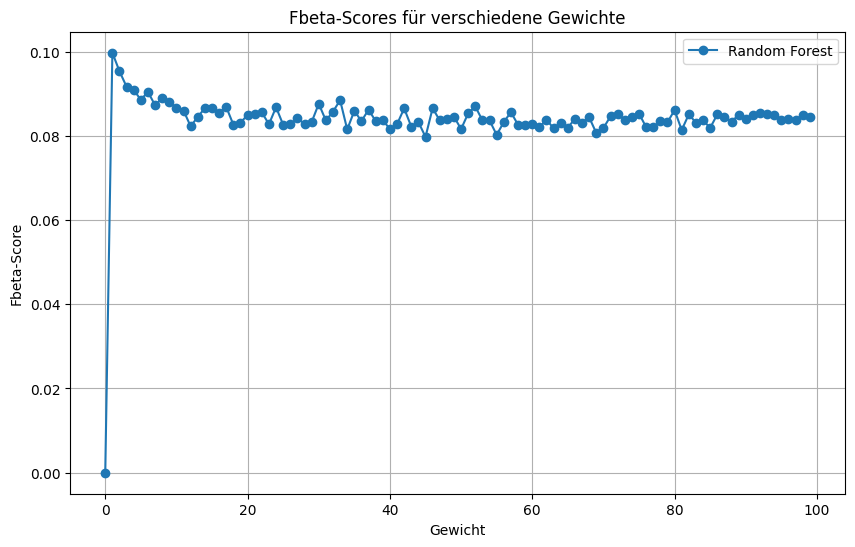

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold

train_data_loaded = pd.read_csv('../data/train_data_2024-08-01.csv')

X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']


# KFold-Konfiguration
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# fbeta mit beta = 2
beta = 2
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

import matplotlib.pyplot as plt

# Leere Listen für Scores

f1_scores_rf = []

weights = range(0, 100)

for i in weights:
    

    # Random Forest
    rf_clas = RandomForestClassifier(bootstrap = False, random_state=42, class_weight={0:1, 1: i}, )

    # F1-Score berechnen und speichern
    f1_rf = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    print(f"Weight: {i} F1 Score Random Forest (k-fold): { f1_rf.mean()}")

    f1_scores_rf.append(f1_rf.mean())
    
print("max score: ", max(f1_scores_rf))
# F1-Scores plotten
plt.figure(figsize=(10, 6))

plt.plot(weights, f1_scores_rf, marker='o', label='Random Forest')
plt.title('Fbeta-Scores für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('Fbeta-Score')
plt.legend()
plt.grid(True)
plt.show()